In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Date used is from the Financial inclusion in africa IndabaX Sudan Zindi competition.

# Explaining the features...

# country: Country interviewee is in.
# year: Year survey was done in.
# uniqueid: Unique identifier for each interviewee
# location_type: Type of location: Rural, Urban
# cellphone_access: If interviewee has access to a cellphone: Yes, No
# household_size: Number of people living in one house
# age_of_respondent: The age of the interviewee
# gender_of_respondent: Gender of interviewee: Male, Female
# relationship_with_head: The intervieweeâ€™s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
# marital_status: The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Donâ€™t know
# education_level: Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
# job_type: Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer

In [ ]:
#Import data
train_data = pd.read_csv('C:/Users/admin/Desktop/A֍∞/Hands on ML, my codes and data/datasets/financial inclusion by IndabaX Sudan/Train.csv')
test_data = pd.read_csv('C:/Users/admin/Desktop/A֍∞/Hands on ML, my codes and data/datasets/financial inclusion by IndabaX Sudan/Test.csv')

In [ ]:
print('train data shape:', train_data.shape)
print('test data shape:', test_data.shape)

train data shape: (23524, 13)
test data shape: (10086, 12)


In [ ]:
#Inspecting the training data
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
print(train_data.describe())
print(train_data.info())

               year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        235

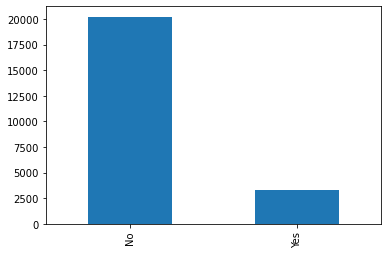

In [ ]:
# Target distubution
train_data.bank_account.value_counts().plot(kind='bar')

In [ ]:
# Data preprocessing
# Converting the target variable to numerical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data['bank_account'] = label.fit_transform(train_data['bank_account'])
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
train_data['year_'] = train_data['year']
test_data['year_'] = test_data['year']
# Convert the following numerical labels from integer to float
train_data[['household_size', 'age_of_respondent',
                         'year_']].values.astype(float)
test_data[['household_size', 'age_of_respondent',
                         'year_']].values.astype(float)

array([[3.000e+00, 3.000e+01, 2.018e+03],
       [7.000e+00, 5.100e+01, 2.018e+03],
       [3.000e+00, 7.700e+01, 2.018e+03],
       ...,
       [1.000e+00, 3.900e+01, 2.018e+03],
       [6.000e+00, 2.800e+01, 2.018e+03],
       [7.000e+00, 1.600e+01, 2.018e+03]])

In [ ]:
# Convert binary categorical features to numerical features by LabelEncoding
# Convert categorical features to numerical features by One Hot Encoding
train_data['country_'] = train_data['country']
test_data['country_'] = test_data['country']

categ = ['relationship_with_head', 'marital_status', 'education_level',
        'job_type', 'country_']

# One hot encoding multivariable features
train_data = pd.get_dummies(train_data, prefix_sep='_', columns = categ)
test_data = pd.get_dummies(test_data, prefix_sep='_', columns = categ)

# Binary variables Encoding
train_data['location_type'] = label.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = label.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = label.fit_transform(train_data['gender_of_respondent'])

test_data['location_type'] = label.fit_transform(test_data['location_type'])
test_data['cellphone_access'] = label.fit_transform(test_data['cellphone_access'])
test_data['gender_of_respondent'] = label.fit_transform(test_data['gender_of_respondent'])

In [ ]:
# Observing our processed data
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,2018,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Separating X from y
X_train = train_data.drop(['year', 'uniqueid', 'country', 'bank_account'],
                          axis = 1)
y_train = train_data['bank_account']

X_test = test_data.drop(['year', 'uniqueid', 'country'],
                         axis = 1)
# Scaling training set and test set
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# inspecting the number of columns of our scaled data
X_train_scaled.shape

(23524, 37)

In [ ]:
# Splitting the training set to training and validation sets
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_scaled, y_train,
                                            stratify = y_train,
                                            test_size = 0.2, random_state = 42)

In [ ]:
# Now entering the Dojo!
################################################################################

In [ ]:
from xgboost import XGBClassifier

my_model = XGBClassifier()

# for fine tuning our hyper parameters we will use the Grid search technique
from sklearn.model_selection import GridSearchCV

param_grid = {'min_child_weight': [1, 5, 10],
           'gamma': [0.5, 1, 1.5, 2, 5],
           'subsample': [0.5, 0.8, 1],
           'colsample_bytree': [0.6, 0.8, 1],
           'max_depth': [3, 4, 5]}

my_model2 = GridSearchCV(my_model, param_grid)
my_model2.fit(X_Train, y_Train)
print(my_model2.best_params_)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Note: use this cell for testing the random forest model...
# fit and Evaluate model
my_model2 = XGBClassifier(colsample_bytree = 0.99, gamma = 20, max_depth = 2,
                          min_child_weight = 12, subsample = 0.99)
my_model2.fit(X_Train, y_Train)
y_pred = my_model3.predict(X_val)

# calculating the error rate
print("Error rate of the Random Forest classifier: ",
      1 - accuracy_score(y_val, y_pred))

# confusion matrix
confusion_matrix(y_pred, y_val)

In [ ]:
### Now fit the model to the full dataset...

my_model2.fit(X_train_scaled, y_train)

In [ ]:
# now test the trained model on the test set
test_data.bank_account = my_model2.predict(X_test_scaled)

In [ ]:
# creating a submission data frame...
submission1 = pd.DataFrame({"uniqueid": test_data["uniqueid"] +
                            " x " + test_data["country"],
                            "bank_account": test_data.bank_account})

In [ ]:
# creating a submission file...
submission1.to_csv('SubmFile_using_full_dataset_after_forest.csv', index = False)